### Image Convolution Exercise

In [1]:
import cv2
import numpy as np
from numpy import *
from matplotlib import pyplot as plt

filename = "Lenna_color.png"
iscolor = 0 # output a grayscale image
img = cv2.imread(filename, iscolor)

### What the image looks like in grey scale

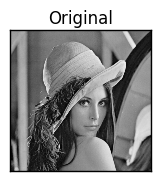

In [2]:
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.show()

### Image Matrix
The image is just a (height x width) matrix of image intensity [0,255] of the grey scale image

In [3]:
print img

[[169 169 168 ..., 175 162 138]
 [169 169 168 ..., 175 162 138]
 [169 169 168 ..., 175 162 138]
 ..., 
 [ 53  53  59 ..., 115 112 114]
 [ 53  53  64 ..., 117 118 122]
 [ 53  53  64 ..., 117 118 122]]


### We are going to use [convolve2d](https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.signal.convolve2d.html) from the scipy.signal library to convolve our image

In [4]:
from scipy.signal import convolve2d

#### Sobel x operator 

In [5]:
sobel_x_operator = [(-1, 0, 1),
                  (-2, 0, 2),
                  (-1, 0, 1)]

sobel_x_img = convolve2d(img, sobel_x_operator, boundary='symm', mode='same')

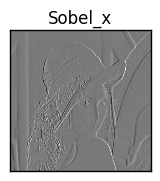

In [6]:
# Added cmap='gray' here makes plt treats our image as gray scale, instead of colored image by default
plt.subplot(2,2,1),plt.imshow(sobel_x_img,cmap = 'gray') 
plt.title('Sobel_x'), plt.xticks([]), plt.yticks([])
plt.show()

#### Sobel y operator

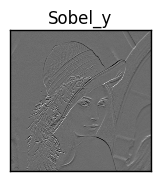

In [7]:
sobel_y_operator = [(-1, -2, -1),
                  (0, 0, 0),
                  (1, 2, 1)]

sobel_y_img = convolve2d(img, sobel_y_operator, boundary='symm', mode='same')

plt.subplot(2,2,1),plt.imshow(sobel_y_img,cmap = 'gray') 
plt.title('Sobel_y'), plt.xticks([]), plt.yticks([])
plt.show()

### Calculate image gradiant's magnitude and direction

In [8]:
# rename our variables for simplicity sake
gradx = sobel_x_img
grady = sobel_y_img

magnitude = sqrt(power(gradx,2) + power(grady,2))
angle = arctan2(gradx,grady)

# Convert radian to degree
angle = angle * (180 / pi)

# Do a simple noise reduction
# When a magnitude is below a threashold (e.g. 10), set the magnitude to 0
eps = 10
x, y = where(magnitude < eps)
magnitude[x,y] = 0
angle[x,y] = 0

### We can visualze (a subset of) the image's vector field with the magnitudes and angles

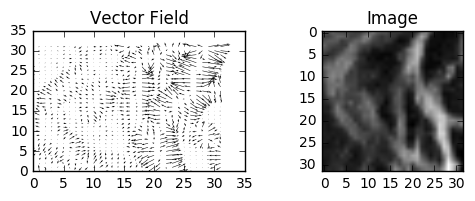

In [26]:
X=gradx[200:232,200:232]
Y=grady[200:232,200:232]

plt.subplot(2,2,1),plt.quiver(X,Y)
plt.title('Vector Field')

plt.subplot(2,2,2),plt.imshow(img[200:232,200:232],cmap = 'gray') 
plt.title('Image')

plt.show()

### Trying Laplacian Filter

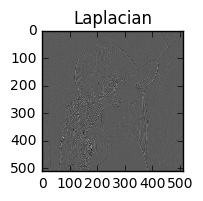

In [43]:
laplace_operator = [(-1, -1, -1),
                    (-1,  8, -1),
                    (-1, -1, -1)]

laplacian_img = convolve2d(img, laplace_operator, mode="same")

plt.subplot(2,2,1),plt.imshow(laplacian_img, cmap="gray")
plt.title("Laplacian")
plt.show()

#### Just for fun, try sharpening the image

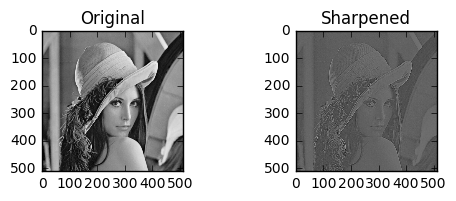

In [39]:
plt.subplot(2,2,1),plt.imshow(img,cmap="gray")
plt.title("Original")
plt.subplot(2,2,2),plt.imshow(laplacian_img+img, cmap="gray")
plt.title("Sharpened")
plt.show()

In [49]:
# mmax = amax(laplacian_img)
# mmin = amin(laplacian_img)
# threshold = (mmax+mmin)*2/3

# print mmax
# print mmin
# print threshold

# x,y = where(laplacian_img <= threshold)
# alt_laplacian_img[x,y] = 10000
# x,y = where(laplacian_img > threshold)
# alt_laplacian_img[x,y] = 10000

# plt.subplot(2,2,1),plt.imshow(alt_laplacian_img, cmap="gray")
# plt.title("Laplacian")
# plt.show()